# 필요한 라이브러리 불러들이기

In [2]:
# 그림그리기 위한 matplotlib 라이브러리 불러오기
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [3]:
# 한글깨지지 않게 하기 위한 코드
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


In [5]:
# 데이터를 저장, 처리하기위한 pandas 라이브러리 불러오기
import pandas as pd
# 숫자 연산을 효율적으로 하기 위한 라이브러리 불러오기
import numpy as np

In [6]:
# 선형회귀모형을 위한 라이브러리
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


# 국어성적, 영어성적 데이터

In [8]:
# pandas 라이브러리의 데이터프레임 (DataFrame)을 사용하여 작은 크기의 데이터 직접입력
# 'kor': 국어성적 (점)
# 'eng': 영어성적 (점)
score = pd.DataFrame(
    { 'kor' : [42, 38, 51, 53, 40, 37, 41, 29, 52, 39, 45, 34, 47, 35, 44, 48, 47, 30, 29, 34],
      'eng'  : [30, 25, 34, 35, 31, 29, 33, 23, 36, 30, 32, 29, 34, 30, 28, 29, 33, 24, 30, 30]
    } )
score

,kor,eng
0,42,30
1,38,25
2,51,34
3,53,35
4,40,31
5,37,29
6,41,33
7,29,23
8,52,36
9,39,30


Text(0.5, 1.0, '국어성적과 영어성적 산점도 ')

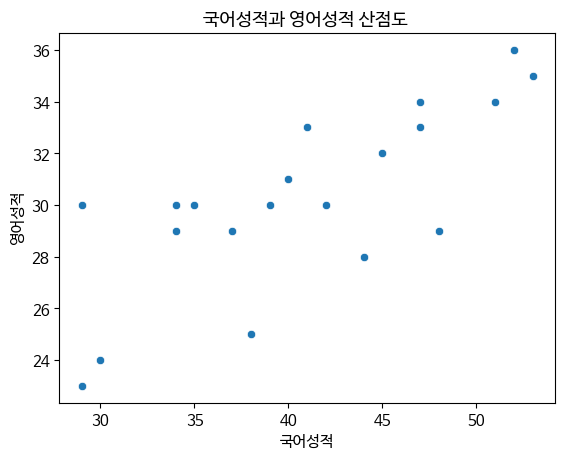

In [10]:
# 산점도 그리기
sns.scatterplot(data=score, x='kor', y= 'eng')
# x축 변수이름
plt.xlabel('국어성적')
# y축 변수이름
plt.ylabel('영어성적')
# 산점도 제목
plt.title('국어성적과 영어성적 산점도 ')

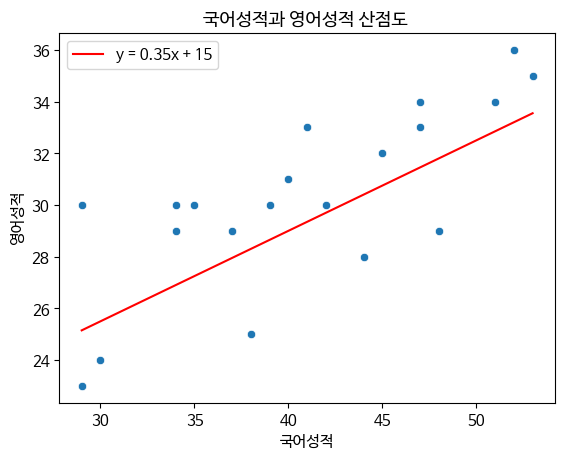

In [22]:
# 산점도와 직선 같이 그리기
sns.scatterplot(data=score, x='kor',y= 'eng')
# x축 변수이름
plt.xlabel('국어성적')
# y축 변수이름
plt.ylabel('영어성적')
# 산점도 제목
plt.title('국어성적과 영어성적 산점도 ')


# y = 0.35 * x + 15 직선 추가
x_vals = np.linspace(score['kor'].min(), score['kor'].max(), 100)
y_vals = 0.35 * x_vals + 15  # 직선의 방정식

# 직선 그리기
plt.plot(x_vals, y_vals, color='red', label = 'y = 0.35x + 15')


# 범례 추가
plt.legend()


### 국어성적(x), 영어성적(y) 데이터를 이용한 회귀모형

In [23]:
score_fit = smf.ols(formula='eng ~ kor', data=score).fit()
score_fit.params

,0
Intercept,15.989850
kor,0.349942


Text(0, 0.5, '영어성적')

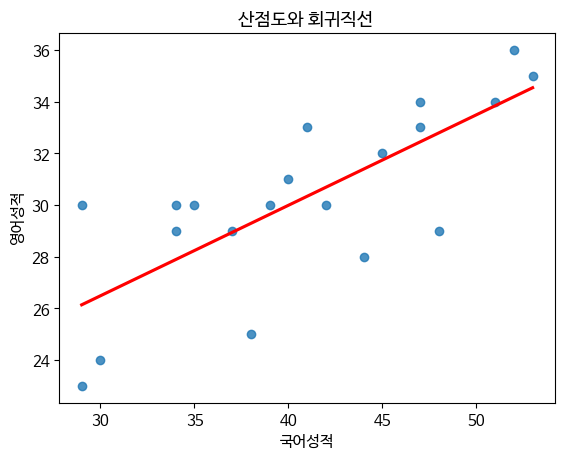

In [26]:
# seaborn으로 산점도와 회귀선 그리기
sns.regplot(x='kor', y='eng', data=score, ci = None, line_kws={'color': 'red'})

# 제목 추가
plt.title('산점도와 회귀직선 ')
# x축 변수이름
plt.xlabel('국어성적')
# y축 변수이름
plt.ylabel('영어성적')

# 속력과 제동거리 데이터

In [27]:

# 속력과 제동거리 데이터 사용해보기
# 'speed' : 속력 (mph, mile per hour)
# 'dist' : 제동거리 (ft)
cars = pd.DataFrame(
    {'speed' : [4, 4, 7, 7, 8, 9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25],
      'dist' : [2, 10, 4, 22, 16, 10, 18, 26, 34, 17, 28, 14, 20, 24, 28, 26, 34, 34, 46, 26, 36, 60, 80, 20, 26, 54, 32, 40, 32, 40, 50, 42, 56, 76, 84, 36, 46, 68, 32, 48, 52, 56, 64, 66, 54, 70, 92, 93, 120, 85]
    })
cars

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


Text(0.5, 1.0, '속력과 제동거리 산점도 ')

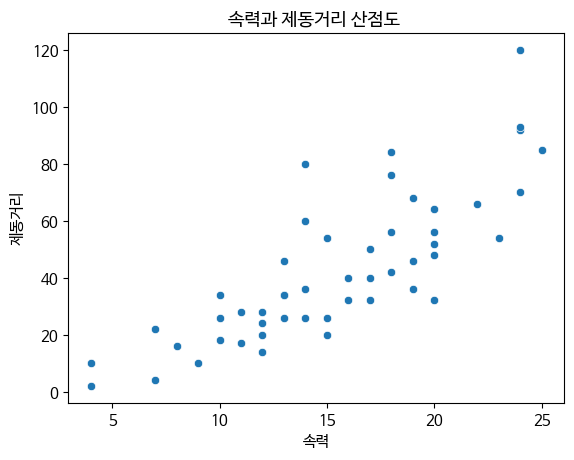

In [28]:
# 산점도 그리기
sns.scatterplot(data=cars, x='speed',y= 'dist')
# x축 변수이름
plt.xlabel('속력')
# y축 변수이름
plt.ylabel('제동거리')
# 산점도 제목
plt.title('속력과 제동거리 산점도 ')

### 속력(x)과 제동거리(y)를 이용한 회귀모형

In [29]:
cars_fit = smf.ols(formula='dist ~ speed', data=cars).fit()
cars_fit.params

,0
Intercept,-17.579095
speed,3.932409


Text(0, 0.5, '제동거리')

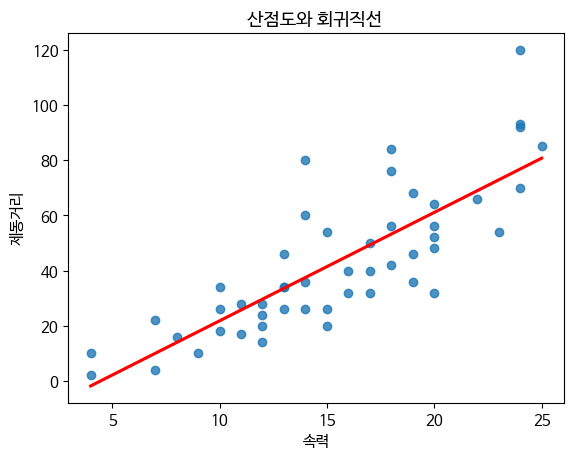

In [30]:
# seaborn으로 산점도와 회귀선 그리기
sns.regplot(x='speed', y='dist', data=cars, ci=None, line_kws={'color': 'red'})

# 제목 추가
plt.title('산점도와 회귀직선 ')
# x축 변수이름
plt.xlabel('속력')
# y축 변수이름
plt.ylabel('제동거리')

In [31]:
# 잔차제곱합 계산하기
SSE= (cars_fit.resid**2).sum()
SSE

np.float64(11353.52105109489)

In [32]:
# 총 제곱합 계산하기
y_mean = cars['dist'].mean()
SST = ((cars['dist'] - y_mean)**2).sum()
SST

np.float64(32538.980000000003)

In [33]:
# 결정계수 구하기
Rsquared = 1 - SSE/SST
Rsquared

np.float64(0.6510793807582509)

In [34]:
# 결정계수를 제공되는 함수로 바로 구하기
cars_fit.rsquared

np.float64(0.6510793807582509)

### 회귀모형에 제곱항 추가하기

In [36]:
# 제곱항 추가하기
cars2 = cars
cars2['speed_squared'] = cars2['speed']**2
cars_fit2 = smf.ols(formula='dist ~ speed + speed_squared', data=cars2).fit()
cars_fit2.params


,0
Intercept,2.470138
speed,0.913288
speed_squared,0.099959


In [38]:
# 산점도와 회귀선 그리기
speed_range = np.linspace(cars2['speed'].min(), cars2['speed'].max(), 100)
pred_cars2 = pd.DataFrame({
    'speed': speed_range,
    'speed_squared': speed_range**2
})
pred_cars2['pred_dist'] = cars_fit2.predict(pred_cars2)

Text(0.5, 1.0, '속력과 제동거리 산점도와 회귀식 ')

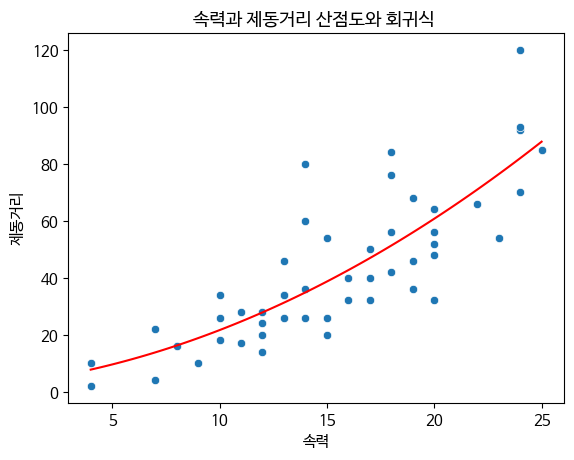

In [39]:
# 산점도 그리기
sns.scatterplot(data=cars2, x='speed',y= 'dist')
sns.lineplot(x='speed', y='pred_dist', data=pred_cars2, color='red')
# x축 변수이름
plt.xlabel('속력')
# y축 변수이름
plt.ylabel('제동거리')
# 산점도 제목
plt.title('속력과 제동거리 산점도와 회귀식 ')

In [ ]:
#결정계수
cars_fit2.rsquared

np.float64(0.6673308165262097)

# 월 평균 기온과 월 평균 최대전력사용량 데이터

In [40]:
# 월 평균 최대전력과 평균기온 자료
# 'peak_power': 월 평균 최대전력 (MW)
# 'ave_temp': 월 평균기온 (섭씨)
power = pd.DataFrame(
    {'peak_power' : [77620, 72010, 67268, 63917, 63388, 68857, 81158, 77300, 69327, 67052, 70028,78180, 79797, 77278, 71145, 66096, 66243, 71805, 82007, 80375, 70674, 66443,68926, 82176],
      'ave_temp' : [-1.1, 3.4, 8.7, 13.2, 16.6, 21.7, 26.0, 24.8, 21.3, 15.1, 8.3, 1.9, -0.8, -0.1,  7.7, 13.8, 18.0, 22.4, 25.9, 25.3, 21.0, 14.0, 9.6, -1.4]
    })
power

,peak_power,ave_temp
0,77620,-1.1
1,72010,3.4
2,67268,8.7
3,63917,13.2
4,63388,16.6
5,68857,21.7
6,81158,26.0
7,77300,24.8
8,69327,21.3
9,67052,15.1


Text(0.5, 1.0, '평균기온과 최대전력 산점도 ')

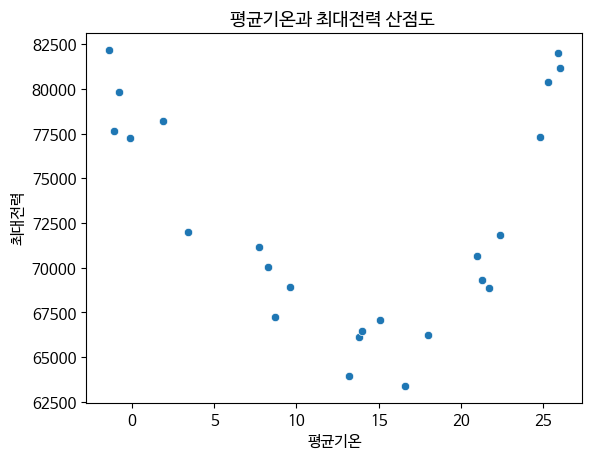

In [41]:
# 평균기온과 최대전력 산점도 그리기
sns.scatterplot(data=power, x='ave_temp', y='peak_power')

# x축 변수이름
plt.xlabel('평균기온')
# y축 변수이름
plt.ylabel('최대전력')
# 산점도 제목
plt.title('평균기온과 최대전력 산점도 ')

### 월 평균 기온 (x), 월 평균 최대전력(y) 를 이용한 회귀모형

In [42]:
power_fit = smf.ols(formula='peak_power ~ ave_temp', data=power).fit()
power_fit.params

,0
Intercept,73486.756130
ave_temp,-78.059458


Text(0, 0.5, '최대전력')

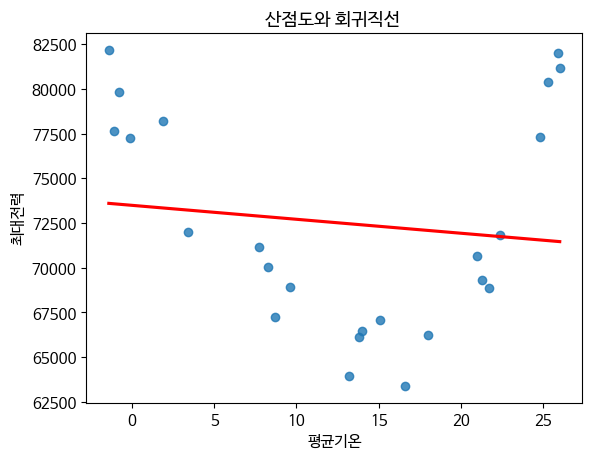

In [43]:
# seaborn으로 산점도와 회귀선 그리기
sns.regplot(x='ave_temp', y='peak_power', data=power, ci=None, line_kws={'color': 'red'})

# 제목 추가
plt.title('산점도와 회귀직선 ')
# x축 변수이름
plt.xlabel('평균기온')
# y축 변수이름
plt.ylabel('최대전력')

In [ ]:
power_fit.rsquared

np.float64(0.014431093123215444)

### 제곱항을 회귀모형에 추가하기

In [44]:
# 제곱항 추가하기
power2 = power
power2['ave_temp_squared'] = power2['ave_temp']**2
power_fit2 = smf.ols(formula='peak_power ~ ave_temp+ ave_temp_squared', data=power2).fit()
power_fit2.params

,0
Intercept,78642.452005
ave_temp,-2018.629555
ave_temp_squared,79.079967


In [46]:
# 산점도와 회귀선 그리기
ave_temp_range = np.linspace(power2['ave_temp'].min(), power2['ave_temp'].max(), 100)
pred_power2 = pd.DataFrame({
    'ave_temp': ave_temp_range,
    'ave_temp_squared': ave_temp_range**2
})
pred_power2['pred_peak_power'] = power_fit2.predict(pred_power2)

Text(0.5, 1.0, '평균기온과 최대전력 산점도와 회귀식 ')

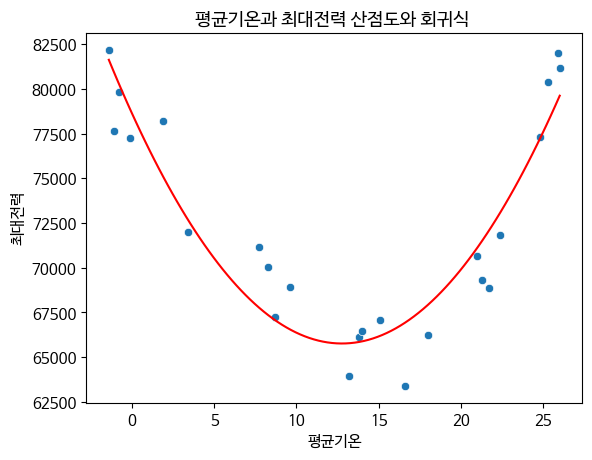

In [47]:
# 산점도 그리기
sns.scatterplot(data=power, x='ave_temp',y= 'peak_power')
sns.lineplot(x='ave_temp', y='pred_peak_power', data=pred_power2, color='red')
# x축 변수이름
plt.xlabel('평균기온')
# y축 변수이름
plt.ylabel('최대전력')
# 산점도 제목
plt.title('평균기온과 최대전력 산점도와 회귀식 ')

In [45]:
power_fit2.rsquared

np.float64(0.8841830828948174)

# Anscombe 데이터

In [61]:
# anscombe 데이터에 대해서 각각 평균, 분산, 상관계수 계산하는 코드

# seaborn라이브러리에 있는 Anscombe quartet 데이터 불러오기
anscombe = sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [62]:

# 데이터셋별로 그룹화
datasets = anscombe.groupby('dataset')

# 각 데이터셋에 대한 통계량 계산 및 출력
for dataset_name, data in datasets:
    print(f"Dataset: {dataset_name}")
    print(f"  Mean of x: {data['x'].mean()}")
    print(f"  Variance of x: {data['x'].var()}")
    print(f"  Mean of y: {data['y'].mean()}")
    print(f"  Variance of y: {data['y'].var()}")
    print(f"  Correlation between x and y: {data['x'].corr(data['y'])}")
    print("-" * 20)


Dataset: I
  Mean of x: 9.0
  Variance of x: 11.0
  Mean of y: 7.500909090909093
  Variance of y: 4.127269090909091
  Correlation between x and y: 0.81642051634484
--------------------
Dataset: II
  Mean of x: 9.0
  Variance of x: 11.0
  Mean of y: 7.50090909090909
  Variance of y: 4.127629090909091
  Correlation between x and y: 0.8162365060002428
--------------------
Dataset: III
  Mean of x: 9.0
  Variance of x: 11.0
  Mean of y: 7.5
  Variance of y: 4.12262
  Correlation between x and y: 0.8162867394895984
--------------------
Dataset: IV
  Mean of x: 9.0
  Variance of x: 11.0
  Mean of y: 7.500909090909091
  Variance of y: 4.12324909090909
  Correlation between x and y: 0.8165214368885028
--------------------


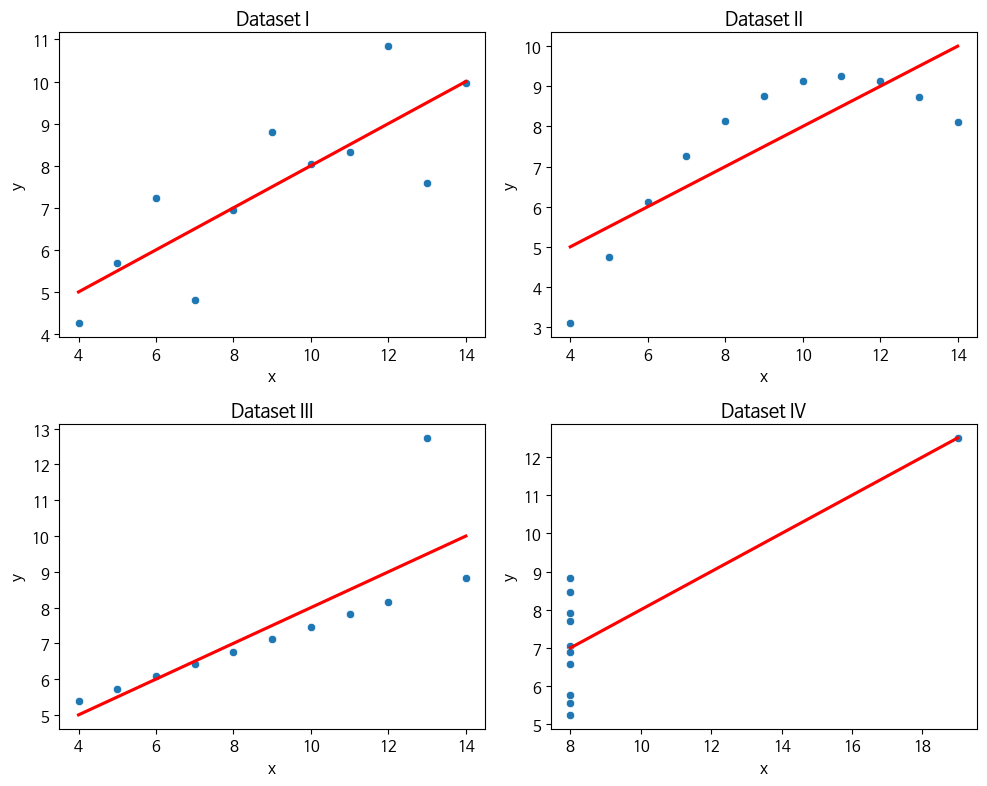

In [63]:
# 데이터셋별로 산점도와 회귀직선을 그리기

# 2x2 형태로 그래프 출력
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 각 데이터셋에 대해 반복
for i, (dataset_name, data) in enumerate(datasets):
    # //: 몫, %: 나머지.
    row = i // 2   # 0, 0, 1, 1
    col = i % 2    # 0, 1, 0, 1
    ax = axes[row, col]

    # 산점도 그리기
    sns.scatterplot(x='x', y='y', data=data, ax = ax)

    # 회귀선 추가 (ci=None으로 신뢰구간 제거)
    sns.regplot(x='x', y='y', data=data, ci=None, scatter=False, ax=ax, line_kws={'color': 'red'})

    # 그래프 제목 설정
    ax.set_title(f"Dataset {dataset_name}")

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


# 재표본(resamplig) 방법을 통한 회귀계수의 변동성에 대해 알아보기

In [69]:
#속력, 제동거리 데이터에서 처음 25개로 회귀모형 적합하기
cars3 = cars.head(25)
cars3_fit = smf.ols(formula='dist ~ speed', data = cars3).fit()
cars3_fit.params

,0
Intercept,-10.003079
speed,3.289087


In [ ]:
# 속력, 제동거리 데이터에서 25번째부터 50번째 데이터로 회귀모형 적합하기
cars4 = cars[25:50]
cars4_fit = smf.ols(formula='dist ~ speed', data=cars4).fit()
cars4_fit.params


,0
Intercept,-42.036446
speed,5.149921


### 속력,제동거리 데이터를 resampling하여 추정된 회귀계수 b의 변동성 알아보기

Text(0.5, 1.0, 'Resampling해서 구한 회귀계수 b의 히스토그램')

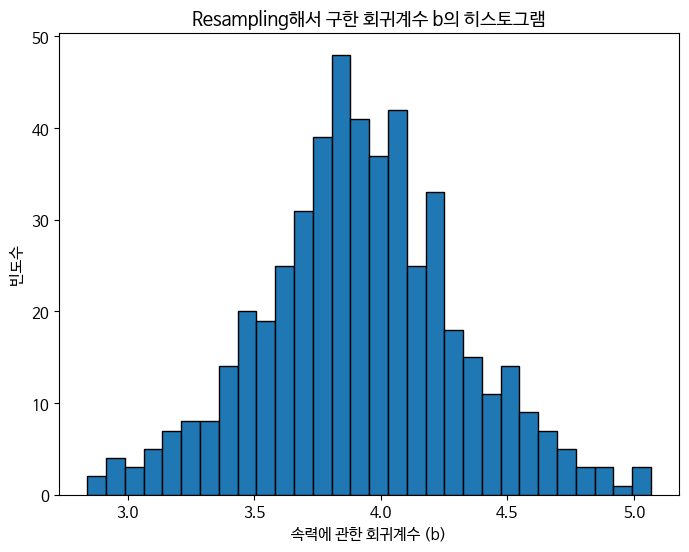

In [71]:
# resampling 크기 정하기
n_resamples = 500
# 회귀계수 추정값 b 저장하기위한 변수 정하기
coefficients = []

# n_samples만큼 반복하기
for _ in range(n_resamples):
    # resampling하기
    resampled_cars = cars.sample(n=len(cars), replace=True)

    # resampling데이터로 회귀모형 적합하기
    resampled_fit = smf.ols(formula='dist ~ speed', data=resampled_cars).fit()

    # 회귀계수 b저장하기
    coefficients.append(resampled_fit.params['speed'])

# plot 쉽게 하기 위해서 numpy array로 변환하기
coefficients = np.array(coefficients)

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(coefficients, bins=30, edgecolor='black')
plt.xlabel('속력에 관한 회귀계수 (b)')
plt.ylabel('빈도수 ')
plt.title('Resampling해서 구한 회귀계수 b의 히스토그램')
plt.show()


# 재표본 방법을 이용한 회귀계수의 유의성 (즉, b 가 0이 아니다) 알아보기

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


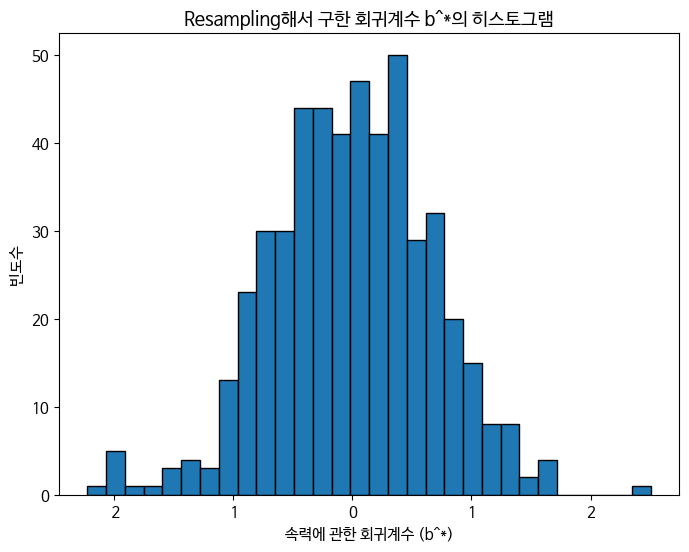

In [72]:
# b=0일때, 즉 x와 y가 관련이 없다는 가정하에 resampling 여러번 진행하여 b=0일때의
# 추정된 회귀계수 b의 변동성 (히스토그램) 구하기
# 이를위해 속력과 제동거리를 따로 resampling해서 회귀계수를  여러번 추정하여
# 히스토그램 그리기

# choices함수 쓰기위한 random 라이브러리 불러오기
import random

# resampling 크기 정하기
n_resamples = 500
# 회귀계수 추정값 b^* 저장하기위한 변수 정하기
coefficients = []

# n_samples만큼 반복하기
for _ in range(n_resamples):
    # 속력하고 제동거리를 따로 resampling하기 (복원추출)
    # 속력 또는 제동거리 하나만 resampling 해도 됨
    resampled_speed = random.choices(cars['speed'], k = len(cars))
    #resampling한 속력과 제동거리로 데이터프레임 만들기
    resampled_data = pd.DataFrame({'speed': resampled_speed, 'dist': cars['dist']})
    #resampling한 데이터로 선형회귀모형 적합하기
    resampled_fit = smf.ols('dist ~ speed', data=resampled_data).fit()
    #적합한 회귀계수 b^* 저장하기
    coefficients.append(resampled_fit.params['speed'])

# plot 쉽게 하기 위해서 numpy array로 변환하기
coefficients = np.array(coefficients)

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(coefficients, bins=30, edgecolor='black')
plt.xlabel('속력에 관한 회귀계수 (b^*)')
plt.ylabel('빈도수 ')
plt.title('Resampling해서 구한 회귀계수 b^*의 히스토그램')
plt.show()


# 가상 데이터로 회귀계수 유의성 확인해보기

### 가상데이터 1

In [75]:
# 지역별 범죄건수 (y) = a + b 지역별 유흥업소수(x) + 오차

# 랜덤 시드 고정 (매번 같은 결과 나오도록)
np.random.seed(123)

# 데이터 생성
a = 50
b = 0
x = np.random.poisson(500, size=100)
y = a + b * x + np.random.normal(0, 1, size=100)

# 데이터프레임으로 묶기
crime = pd.DataFrame({'x': x, 'y': y})

# 선형모형  적합
crime_fit = smf.ols('y ~ x', data=crime).fit()

# 회귀계수 추출
crime_fit.params

,0
Intercept,52.463577
x,-0.005223


In [76]:
# 앞에서 생성한 가상데이터 crime을 이용해서 Resampling을 통해 b의 히스토그램 구하기

# resampling b저장하기위한 변수 생성
b_star = []

# 1000번 반복하기
for _ in range(1000):
    # 랜덤하게 index 추출 (복원추출 )
    indx = np.random.choice(100, size=100, replace=True)
    # 새로 뽑은 index들에 대응되는 데이터들만 모아서 따로 데이터프레임 만들기
    sample_df = crime.iloc[indx]
    # 선형회귀모형 적합
    model = smf.ols('y ~ x', data=sample_df).fit()
    # 추정된 회귀계수 b 저장하기
    b_star.append(model.params['x'])

# plot 쉽게 하기 위해서 numpy array로 변환하기
b_star = np.array(b_star)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


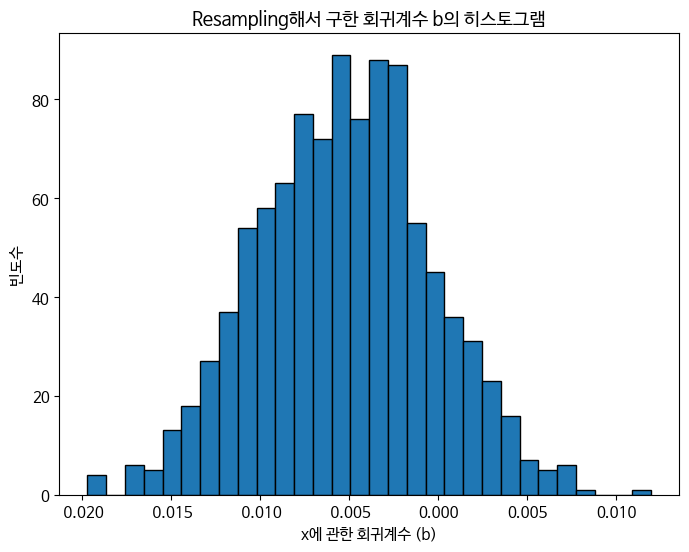

In [77]:
# 앞에서 생성한 가상데이터 crime을 이용해서 Resampling을 통해 b의 히스토그램 구하기
plt.figure(figsize=(8, 6))
plt.hist(b_star, bins=30, edgecolor='black')
#plt.axvline(x=crime_fit.params['x'], color='red', linestyle='dotted', linewidth=3)
plt.xlabel('x에 관한 회귀계수 (b)')
plt.ylabel('빈도수 ')
plt.title('Resampling해서 구한 회귀계수 b의 히스토그램')
plt.show()


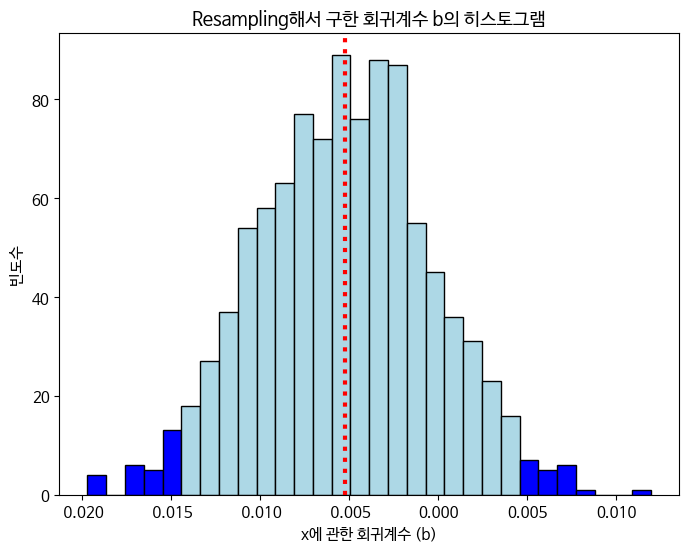

In [81]:
# 위의 히스토그램에서 crime데이터로 적합한 선형회귀계수를 추가하고
# 양 끝의 2.5%에 해당하는 부분 다른 색상으로 표시하기

# 양쪽 2.5% cutoff 값 계산
lower_bound = np.percentile(b_star, 2.5)
upper_bound = np.percentile(b_star, 97.5)

# 히스토그램 bin 계산
counts, bins = np.histogram(b_star, bins=30)

# bin마다 색깔 지정
colors = []
for i in range(len(bins) - 1):
    if bins[i] < lower_bound:
        colors.append('blue')     # 하위 2.5%
    elif bins[i] > upper_bound:
        colors.append('blue')    # 상위 2.5%
    else:
        colors.append('lightblue')  # 중앙 95%


# 히스토그램 그리기
plt.figure(figsize=(8, 6))
for i in range(len(bins) - 1):
    plt.bar((bins[i] + bins[i+1]) / 2, counts[i], width=(bins[i+1]-bins[i]),
            color=colors[i], edgecolor='black', align='center')
plt.axvline(x=crime_fit.params['x'], color='red', linestyle='dotted', linewidth=3)
plt.xlabel('x에 관한 회귀계수 (b)')
plt.ylabel('빈도수 ')
plt.title('Resampling해서 구한 회귀계수 b의 히스토그램')
plt.show()

### 가상데이터 2

In [82]:
# 지역별 범죄건수 (y) = a + b 지역별 유흥업소수(x) + 오차

# 랜덤 시드 고정 (매번 같은 결과 나오도록)
np.random.seed(123)

# 데이터 생성
a = 50
b = 0.02
x = np.random.poisson(500, size=100)
y = a + b * x + np.random.normal(0, 1, size=100)

# 데이터프레임으로 묶기
crime2 = pd.DataFrame({'x': x, 'y': y})

# 선형모형  적합
crime2_fit = smf.ols('y ~ x', data=crime2).fit()

# 회귀계수 추출
crime2_fit.params

,0
Intercept,52.463577
x,0.014777


In [83]:
# 앞에서 생성한 가상데이터 crime2에서 x와 y가 관계가 없다는 가정을하고
# Resampling을 통해 b^*의 히스토그램 구하기
# 그러므로 y는 고정시키고 x만 resampling을 하기

# resampling b^* 저장하기위한 변수 생성
b_star = []

for _ in range(1000):
    # 복원추출로 index 랜덤하게 추출
    indx = np.random.choice(100, size=100, replace=True)
    # 랜덤하게 추출한 index에 대응되는 x를 새로 만들기
    newx = crime2['x'].iloc[indx].reset_index(drop=True)
    # y는 그대로 고정
    y_fixed = crime['y'].reset_index(drop=True)
    # newx, y_fixed가지고 새로운 데이터프레임 만들기
    sample_df = pd.DataFrame({'x': newx, 'y': y_fixed})
    # 선형회귀모형 적합
    model = smf.ols('y ~ x', data=sample_df).fit()
    # 추정된 회귀계수 저장
    b_star.append(model.params['x'])

# plot 쉽게 하기 위해서 numpy array로 변환하기
b_star = np.array(b_star)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


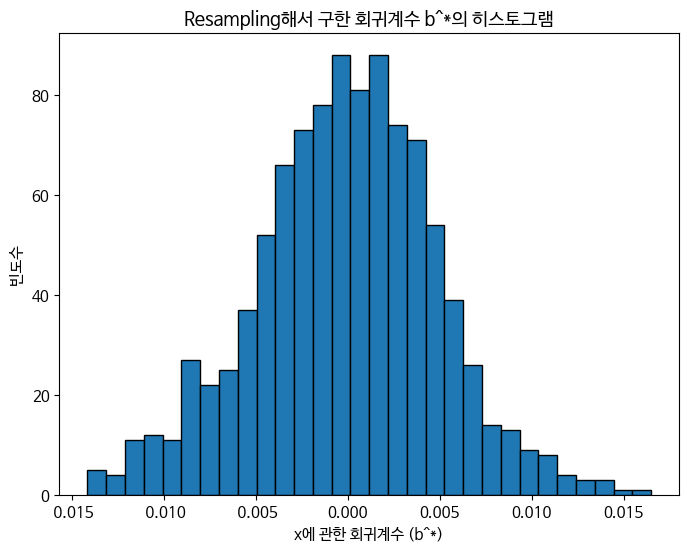

In [84]:
# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(b_star, bins=30, edgecolor='black')
plt.xlabel('x에 관한 회귀계수 (b^*)')
plt.ylabel('빈도수 ')
plt.title('Resampling해서 구한 회귀계수 b^*의 히스토그램')
plt.show()


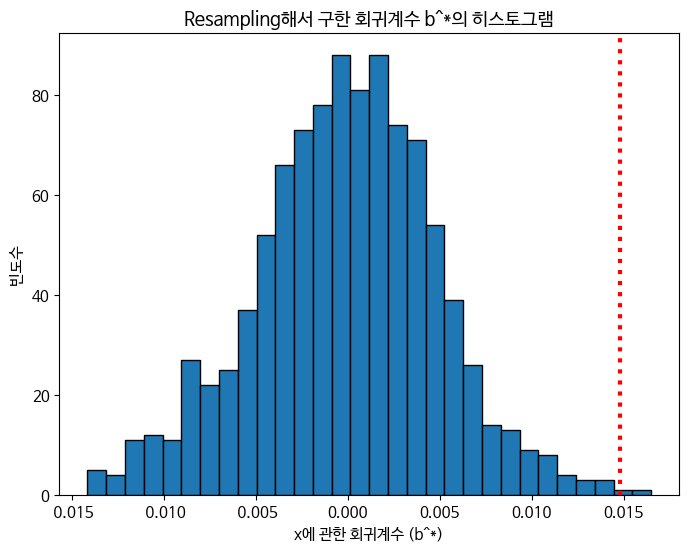

In [85]:
# crime2데이터를 선형모형 적합한 회귀계수를 히스토그램에 추가하기
plt.figure(figsize=(8, 6))
plt.hist(b_star, bins=30, edgecolor='black')
plt.axvline(x=crime2_fit.params['x'], color='red', linestyle='dotted', linewidth=3)
plt.xlabel('x에 관한 회귀계수 (b^*)')
plt.ylabel('빈도수 ')
plt.title('Resampling해서 구한 회귀계수 b^*의 히스토그램')
plt.show()


# 반응변수 (Y)가 0,1로 주어진 경우의 데이터사이의 관계찾기

## 타이타닉 데이터 구경하기

In [86]:
# seaborn 라이브러리에서 타이타닉 데이터 불러오기
titanic = sns.load_dataset('titanic')


In [87]:
# 데이터 확인
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [89]:
# 그림그리기위한 색상 정하기
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")
pal

{'man': '#4682B4',
 'woman': '#CD5C5C',
 'child': '#2E8B57',
 'male': '#6495ED',
 'female': '#F08080'}

<ipython-input-90-e44dd112113c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g= sns.catplot(x="sex", data=titanic, palette=pal, kind="count");


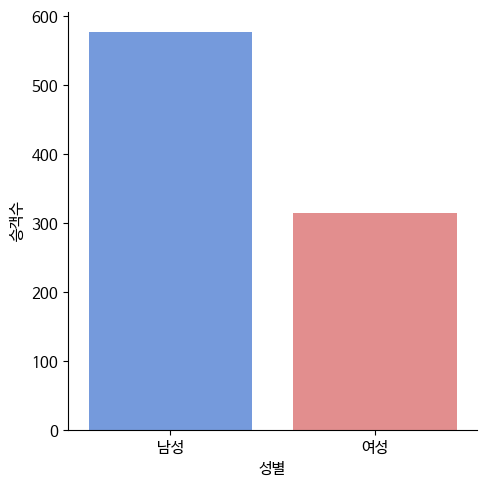

In [90]:
# 탑승객의 남성 여성 비율
g= sns.catplot(x="sex", data=titanic, palette=pal, kind="count");
g.set_axis_labels("성별", "승객수")
g.set_xticklabels(["남성", "여성"])

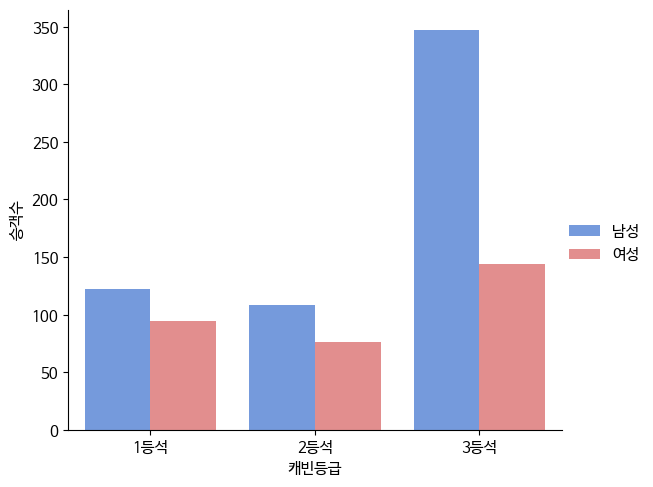

In [94]:
# 캐빈 등급별 남/여 비율
g= sns.catplot(x="class", data=titanic, hue="sex", palette=pal, kind="count");
g.set_axis_labels("캐빈등급", "승객수")
g.set_xticklabels(["1등석", "2등석", "3등석"])
g._legend.remove()
g.add_legend(labels = ["남성","여성"])

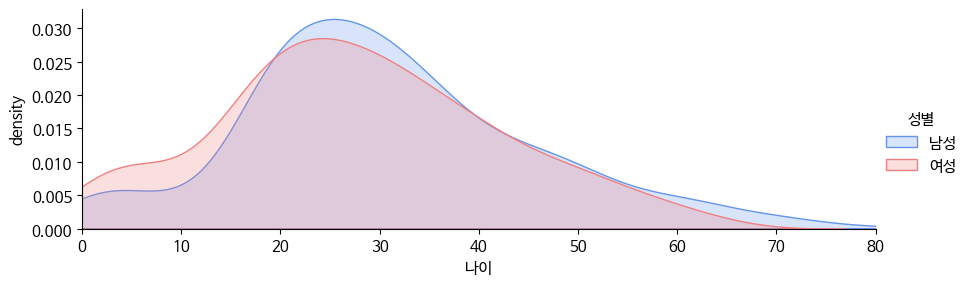

In [96]:
# 남녀 나이 분포
fg = sns.FacetGrid(titanic, hue="sex", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", fill=True)
fg.set(xlim=(0, 80))
fg.set_axis_labels("나이", "density")
fg.add_legend(labels = ["남성","여성"], title="성별")

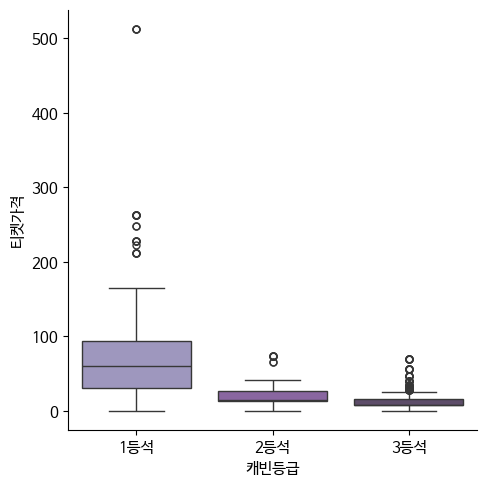

In [99]:
# 캐빈등급별 티켓가격
g = sns.catplot(x="class", y="fare", data=titanic, palette="BuPu_d", hue="class",kind="box")
g.set_axis_labels("캐빈등급", "티켓가격")
g.set_xticklabels(["1등석", "2등석", "3등석"])

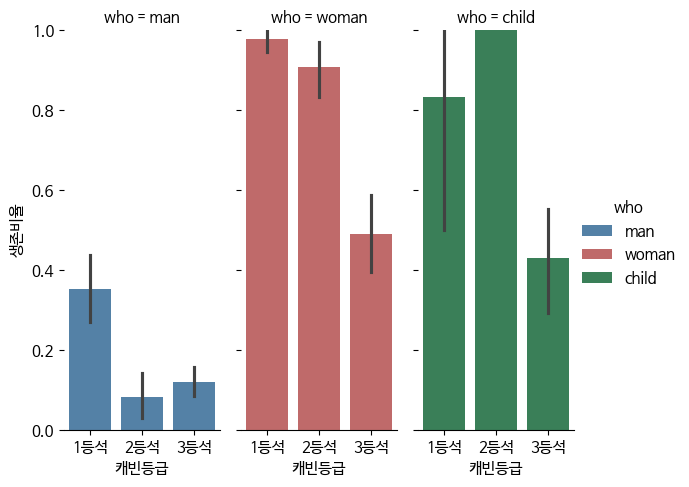

In [110]:
# 캐빈등급과 "who" (남성, 여성, 어린이) 별 생존 비율
fg = sns.catplot(x="class", y="survived", data=titanic, hue="who", col="who",
                 palette=pal, aspect=.4, kind="bar")
fg.set(ylim=(0, 1))
fg.despine(left=True)
fg.set_axis_labels("캐빈등급", "생존비율")
fg.set_xticklabels(["1등석", "2등석", "3등석"])

In [112]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### 나이, 성별, 캐빈등급, 생존여부로 구성된 데이터셋으로 로지스틱회귀모형 적합하기

In [113]:
# 생존여부, 나이, 성별, 캐빈등급만 가지는 데이터 만들기
df = titanic[['survived', 'age', 'sex', 'class']]
# 성별, 캐빈등급 더미변수 만들기
df = pd.get_dummies(df, columns=['sex', 'class'])
# 결측치 제거하기
df.dropna(inplace=True)
df.head()

,survived,age,sex_female,sex_male,class_First,class_Second,class_Third
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


In [114]:
# 데이터를 훈련데이터(train set), 검증데이터(test set)로 80% 20% 나누기
# 이때 y (survived)기준으로 같은 비율 유지하도록 나누기
from sklearn.model_selection import train_test_split

x = df.drop('survived', axis=1)
y = df['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1234)

In [115]:
# 훈련데이터로 로지스틱 회귀모형 적합
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=4321)
model.fit(x_train, y_train)

LogisticRegression(random_state=4321)

In [116]:
# 검증데이터로 정확도 계산
model.score(x_test, y_test)

0.7832167832167832

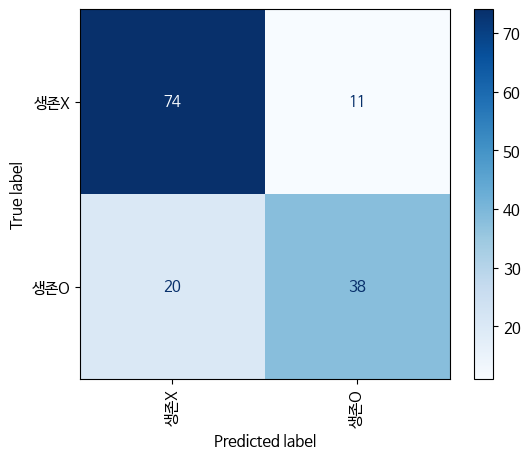

In [123]:
# confusion 행렬구하기
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

# confusion 행렬 그래프로 그리기
from sklearn.metrics import ConfusionMatrixDisplay # plot_confusion_matrix 대신 ConfusionMatrixDisplay import

# ConfusionMatrixDisplay를 사용하여 confusion matrix를 그림으로 표시
disp = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, display_labels=['생존X', '생존O'],
                      cmap='Blues', xticks_rotation='vertical')
#


In [124]:
74/(74+11)

0.8705882352941177

In [136]:
# 예측하기
# 나이 30, 남성 , 3등석 탑승인 경우
predictX = pd.DataFrame([[30, 0, 1, 0, 0, 1]], # 2차원 리스트로
                        columns=['age','sex_female','sex_male',
                                  'class_First','class_Second','class_Third'])

model.predict(predictX)[0]
probability = model.predict_proba(predictX)[0][1]
print(f'생존확률: {probability:.1%}')


생존확률: 8.2%


In [138]:
# 나이 10, 남성, 1등석 탑승인 경우
predictX = pd.DataFrame([[10, 0, 1, 1, 0, 0]], # 2차원 리스트로
                        columns=['age','sex_female','sex_male',
                                  'class_First','class_Second','class_Third'])
model.predict(predictX)[0]
probability = model.predict_proba(predictX)[0][1]
print(f'생존확률: {probability:.1%}')

생존확률: 70.4%
